<a href="https://colab.research.google.com/github/GildasTaliah/ML-In-Finance/blob/main/ML%2BIntro%2BFinance%2Bpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRO MACHINE LEARNING IN FINANCE**




Machine Learning  (ML) in finance refers to the use of algorithms and statistical methods to analyze financial data, price assets, optimize asset allocation,  identify patterns,  make predictions and informed financial decsions without being explicitly programmed.


The need for Machine Learning (ML) market forecast has grown significantly in recent years, as financial markets have become increasingly complex and competitive.

ML leverages large datasets and computational power to enhance task such as predictive modelling/analytics, trading strategies, fraud detection, credit scoring, asset pricing,  portfolio allocation, risk management etc.

# **1. Simple Neural Network**

Here, we see how a neural network is trained: initializing weights, computing errors, then deltas/derivatives, computing the updates, thereafter updating the weights. Lastly obtaining optimal weights, which supposely has lowest estimation errors.




## **1.1 Neural Network: Activation Functions**


First take a look at some few activation functions usually applied in the neurons.

In [7]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

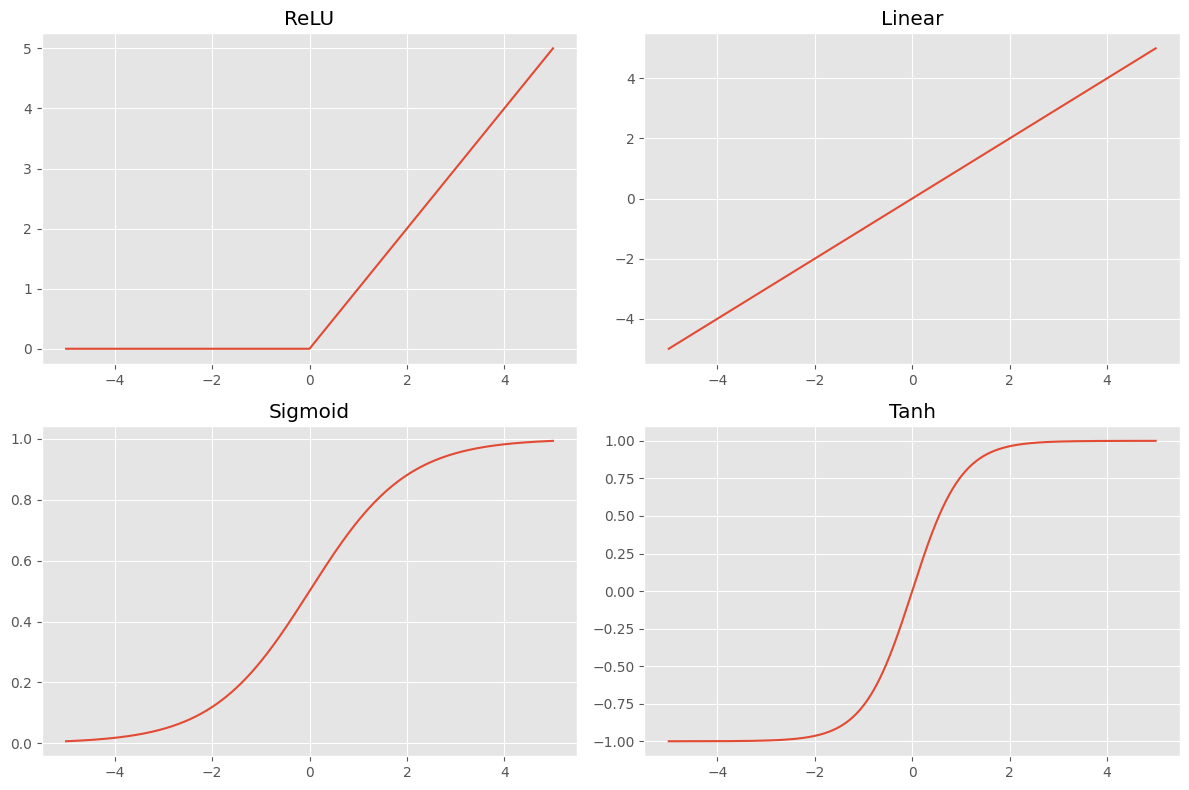

In [8]:
# Linear function
def linear(x):
  return x

# Relu activation function
def relu(x):
  return np.maximum(0, x)

# Sigmoid activation function
def sigmoid(x):
  return  1/ (1 + np.exp(-x))

# Tan H activation function
def tanh(x):
  return  np.tanh(x)

x = np.linspace(-5, 5, 1000)


# Set figure settings
fig, axes = plt.subplots(2, 2, figsize = (12, 8))


## Plots
axes[0, 1].plot(x, linear(x))
axes[0, 1].set_title('Linear')

axes[0, 0].plot(x, relu(x))
axes[0, 0].set_title('ReLU')

axes[1, 0].plot(x, sigmoid(x))
axes[1, 0].set_title('Sigmoid')

axes[1, 1].plot(x, tanh(x))
axes[1, 1].set_title('Tanh')

plt.tight_layout()

- Two activation functions will be considered: Linear and Sigmoid. Thereafter stock market movement prediction.

### **1.1.1 Linear Activation function**

For linear activation function, Linear regression will be used as benchmark to compare the quality of the updated weights (parameters).

Y is generated using the following equation. x  basically is a range of numbers from -5 to 5.

$$ y = 2 + 3.5x + \epsilon $$


Where: $
\epsilon \sim \mathcal{N}(0, 2^2)$

In [74]:
# Create synthetic data for Linear Regression
x = np.linspace(-5, 5, 5)

np.random.seed(1)
y = 2 + 3.5 * x + np.random.standard_normal(len(x)) ** 2

print(x)
print(y)

[-5.  -2.5  0.   2.5  5. ]
[-12.86150214  -6.37575409   2.2789654   11.90126166  20.24893036]


Text(0, 0.5, 'y')

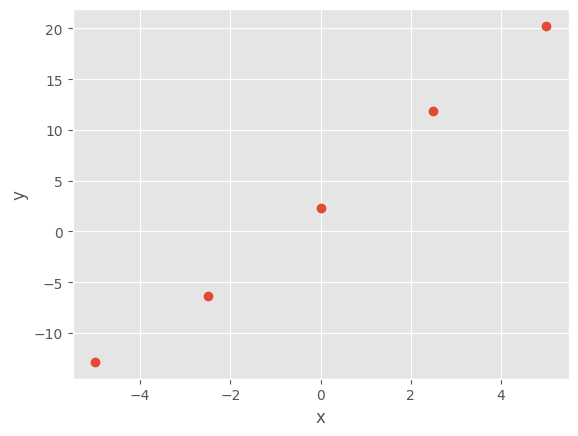

In [75]:
# Plot
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

 **Linear Regression**


Slope:  3.0383802398020796 Constant:  3.3799152305347153


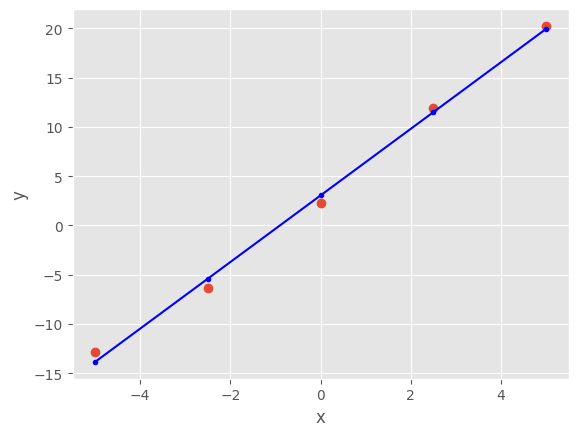

In [80]:
# fitting the Linear Model
Lreg = np.polyfit(x, y, deg=1)
Lreg

# estimate y
y_est = np.polyval(Lreg, x)


plt.plot(x, y, 'o')
plt.plot(x, y_est, 'b.')
plt.plot(x, y_est, 'b')
plt.xlabel('x')
plt.ylabel('y')


print('Slope: ', Lreg[1], 'Constant: ', Lreg[0])

Due to a lot of randomness (variation) of the error term, as seen from the data generation process DGP,  the intercept (initially 2 now 3.38) is incorrect and the slope coefficient is also inaccurate (initially 3.5 now 3.04).

- The estimates implies the regression model is unable to capture the randomness. Also, the OLS essentially fits a straight line, but actual values don't lie in straight, do they ?

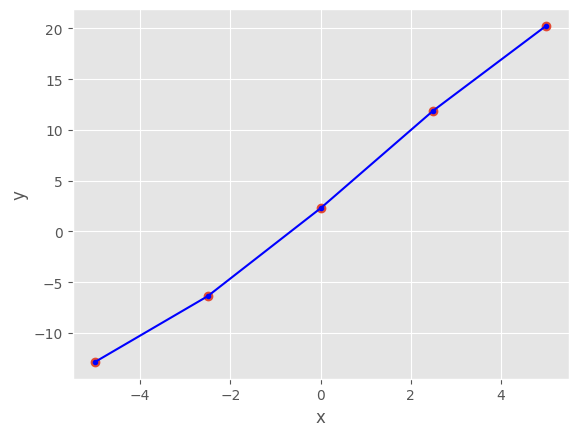

We can observe the accuracy of the prediction, however this is not our goal. We wanna fix the problem of non-linear relationship existing between these two variables using a complex model namely neural network. By the way poly reg with too many deg leads to overfitting.



In [81]:
# fitting with 15 degree polynomials
# estimate y
y_est_15 = np.polyval(np.polyfit(x, y, deg=15), x)


plt.plot(x, y, 'o')
plt.plot(x, y_est_15, 'b.')
plt.plot(x, y_est_15, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


print("We can observe the accuracy of the prediction, however this is not our goal. \
We wanna fix the problem of non-linear relationship existing between these two \
variables using a complex model namely neural network. By the way poly reg with too many deg leads to overfitting.")
print()

- Let us examine the errors, utilizing the Root Mean Squared Metrics RMSE.

In [82]:
# Let us look at error

((y - y_est) ** 2).mean().round(5)

0.55468

**Network Training - Single steps**


In [83]:
l_0 = np.array((x, len(x) * [1])).T
l_0

array([[-5. ,  1. ],
       [-2.5,  1. ],
       [ 0. ,  1. ],
       [ 2.5,  1. ],
       [ 5. ,  1. ]])

In [84]:
# These weights are arbitrary
# The goal is to get optimal weights such that MSE is lowest
# MSE == zero would be fantastic!!

weights = np.array(((2., 2.)) )
weights

array([2., 2.])

In [85]:
l_1 = np.dot(l_0, weights)
l_1

array([-8., -3.,  2.,  7., 12.])

In [86]:
y

array([-12.86150214,  -6.37575409,   2.2789654 ,  11.90126166,
        20.24893036])

In [87]:
# difference : Error
d = y - l_1

mse_1 = ( d**2 ).mean()

print('MSE:  ', mse_1)
print()
d

MSE:   25.43499169817172



array([-4.86150214, -3.37575409,  0.2789654 ,  4.90126166,  8.24893036])

- Errors are high!! We update the weights as follows
- The degree by which we update the weights is defines as follows:
-- Obtain dot product of errors (d) and actual values (x plus constant - l_0). Afterwards multiply results by the **learning rate**.

In [88]:
# Errors

print(d)
print()
print(l_0)


# set alpha - learning rate
alpha = 0.01

# compute update
update = alpha  * np.dot(d, l_0)
update

[-4.86150214 -3.37575409  0.2789654   4.90126166  8.24893036]

[[-5.   1. ]
 [-2.5  1. ]
 [ 0.   1. ]
 [ 2.5  1. ]
 [ 5.   1. ]]


array([0.86244702, 0.05191901])

In [89]:
# print previous weights
print('Actual weights',  [3.5, 2])
print()
print('Previous weights',  weights)
print()

# Update weights
weights += update

print('Updated weights',  weights)

Actual weights [3.5, 2]

Previous weights [2. 2.]

Updated weights [2.86244702 2.05191901]


In [90]:


l_1 = np.dot(l_0, weights)
l_1

# difference : Error
d = y - l_1
mse_2 = ( d**2 ).mean()

print('MSE 2:  ', mse_2 )
print()

MSE 2:   4.87495525973812



In [91]:
# print previous weights
print('Actual weights',  [3.5, 2])
print()
print('Previous weights',  weights)
print()

# Update weights
weights += update

print('Updated weights',  weights)

Actual weights [3.5, 2]

Previous weights [2.86244702 2.05191901]

Updated weights [3.72489404 2.10383802]


In [92]:
# Initilize weights
weights = np.array((2., 2.))

**Network Training - Multi steps**

In [93]:
#
for i in range(41):

  # Layer 1
  l_1 = np.dot(l_0, weights)

  # deltas of layer 1
  d = y - l_1

  if i % 5 == 0:
    print( 'MSE after %4d iterations %6d ' % (i, (d ** 2).mean()))


  # update weights based on deltas
  weights += alpha * np.dot(d, l_0)


print()
print('Actual weights: ', [3.5, 2], '\n')
print('Reg Slope: ', np.round(Lreg[1], 4), 'Reg Constant: ', np.round(Lreg[0], 4), '\n')
print('NN Latest Updated weights: ', np.round(weights, 4))

MSE after    0 iterations     25 
MSE after    5 iterations      1 
MSE after   10 iterations      0 
MSE after   15 iterations      0 
MSE after   20 iterations      0 
MSE after   25 iterations      0 
MSE after   30 iterations      0 
MSE after   35 iterations      0 
MSE after   40 iterations      0 

Actual weights:  [3.5, 2] 

Reg Slope:  3.0384 Reg Constant:  3.3799 

NN Latest Updated weights:  [3.3799 2.9116]


Notice the imrpovement in the prediction as we update the weights. Also how the latest updated weighted is better than Regression's estimation.

**Mean Squared Error (MSE)  Loss Function**

In [94]:
"""
To compute MSE we need the true values (y_true) and predicted values (y_pred)
"""

# We consider the true values range of 1000 values between -5 and 5 for simplicity
# Also, y_pred will just be a random transformation of y_true

y_true =  np.linspace(-5, 5, 1000)

# Transfprm y_true to get y_pred
np.random.seed(1)
y_pred =   [y_true[i] * np.random.choice([1.0, 0.9999, 0.9555, 1.0, 0.9, 0.9999, 1.0]) for i in range(len(y_true))]
y_pred = np.array(y_pred)

# print shapes
print(f'y_true shape: {y_true.shape}')
print(f'y_pred shape: {y_pred.shape}')

print('\n', 'Error: ')
print(((y_pred - y_true) ** 2).mean().round(5), '\n')

print('For accurate predicion points are expected to appear on the line cutting accros the x and y-axis', \
  '\n','Essentially points has to lie on the 45 degree line for accurate prediction')

y_true shape: (1000,)
y_pred shape: (1000,)

 Error: 
0.01485 

For accurate predicion points are expected to appear on the line cutting accros the x and y-axis 
 Essentially points has to lie on the 45 degree line for accurate prediction


In [95]:
# Define the squared error function

def sq_error(y_true, y_pred):
  return (y_true - y_pred)** 2

print(f'First values: y_true: {y_true[0]}, y_pred: {y_pred[0]}')
print(f'Second values: y_true: {y_true[1]}, y_pred: {y_pred[1]}')
print(f'Third values: y_true: {y_true[2]}, y_pred: {y_pred[2]}')

sq_error = [sq_error(y_true, y_pred) for y_true, y_pred in zip(y_true, y_pred)]

print()
print(f'First error {sq_error[0]}')
print(f'Second error {sq_error[1]}')
print(f'Third error {sq_error[2]}')

First values: y_true: -5.0, y_pred: -4.9995
Second values: y_true: -4.98998998998999, y_pred: -4.98998998998999
Third values: y_true: -4.97997997997998, y_pred: -4.481981981981982

First error 2.499999999997229e-07
Second error 0.0
Third error 0.24800200601001385


In [96]:
np.mean(sq_error)


0.014849991689765835

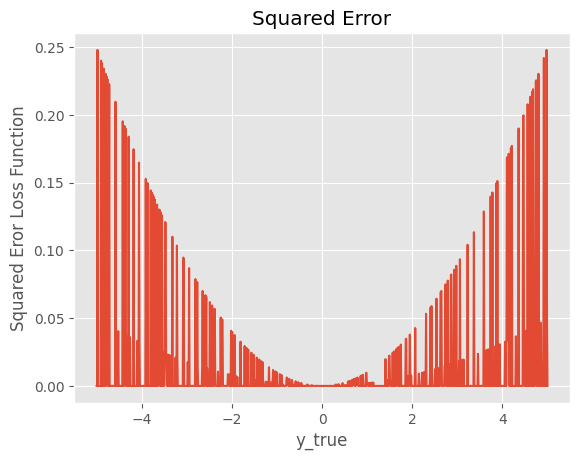

In [97]:
# Plot true values againts their corresponding squared errors.
plt.plot(y_true, sq_error )
plt.xlabel('y_true')
plt.ylabel('Squared Eror Loss Function')
plt.title('Squared Error')
plt.show()



### **1.1.2 Sigmoid Activation function**



In [98]:

# Define sigmoid function, accomodate for the derivative option
def sigmoid(x, derivative = False):
  # compute sigmoid

  sig = 1 / (1 + np.exp(-x))               # Compute sigmoid

  # sigmoid function's derivative is just a function of the sigmoid itself
  # Well, after some differentiation and algebraic actions.

  if derivative:
    return sigmoid(x) * (1 - sigmoid(x))   # Compute derivative of sigmoid

  return sig

Text(0.5, 1.0, 'Sigmoid Derivative')

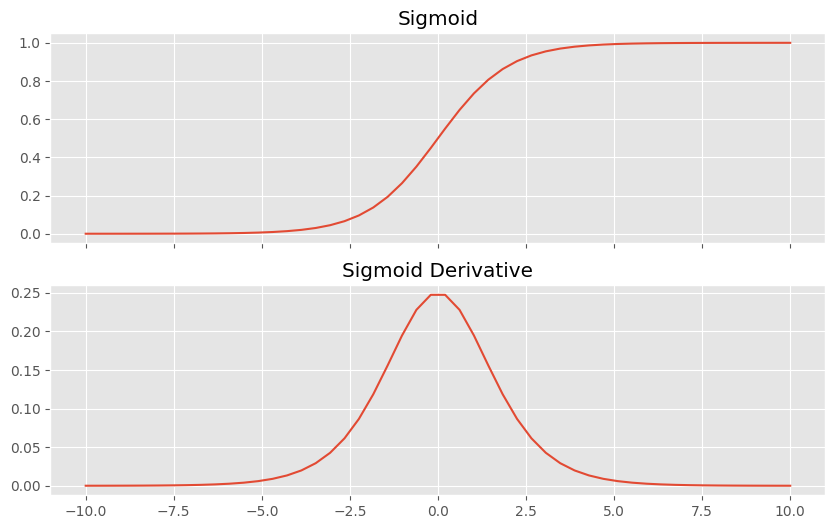

In [99]:

# x values
x = np.linspace(-10, 10)
y = sigmoid(x)

d = sigmoid(x, derivative = True)


fig, ax = plt.subplots(2, sharex= True, figsize = (10, 6))

ax[0].plot(x, y)
ax[0].set_title('Sigmoid')

ax[1].plot(x, d)
ax[1].set_title('Sigmoid Derivative')

In [100]:
# Input data set (features)
# Layer 0

# matrix of size 5 X 4
l0 = np.array([[0, 0, 0, 1],

               [0, 0, 1,  1],

               [1, 1, 0, 1],

               [1, 1, 1, 1],

               [0, 1, 1, 1]])

# output data set  (labels)
# column vector of size 5
y = np.array([0,
              0,
              1,
              1,
              1])
y

array([0, 0, 1, 1, 1])

In [101]:
# Initialize initial random weights
#
np.random.seed(5)
weights = 2 * np.random.random((4, 1)) - 0.95
weights

array([[-0.50601366],
       [ 0.79146461],
       [-0.53656169],
       [ 0.88722182]])

**Single Step**

In [102]:
# dot rpoduct of weights and coefficients
np.dot(l0, weights)

array([[0.88722182],
       [0.35066013],
       [1.17267277],
       [0.63611108],
       [1.14212474]])

In [103]:
l1 = sigmoid(np.dot(l0, weights))
l1

array([[0.70831652],
       [0.58677765],
       [0.76362779],
       [0.65387384],
       [0.75806953]])

In [104]:
# Compute error
e = y.reshape(-1,1) - l1.reshape(-1,1)
print(f'error: \n {e} \n')

# MSE

print(f'MSE: {(e ** 2).mean()}')

error: 
 [[-0.70831652]
 [-0.58677765]
 [ 0.23637221]
 [ 0.34612616]
 [ 0.24193047]] 

MSE: 0.21604515919743164


In [36]:
# Compute derivative

print(f'Compute derivative: \n {sigmoid(l1, derivative= True)}\n')

# Compute delta
d = e * sigmoid(l1, derivative= True)
print(f'delta: \n {d}')

Compute derivative: 
 [[0.22109012]
 [0.22965798]
 [0.21682471]
 [0.22507299]
 [0.21726272]]

delta: 
 [[-0.15660178]
 [-0.13475817]
 [ 0.05125134]
 [ 0.07790365]
 [ 0.05256247]]


In [37]:
# Now compute by how much weights will be updated.

u = np.dot(l0.T, d)
print(f'update: \n {u}')

print(f'Previous weights: \n {weights}\n')

weights += u

print(f'Updated weights: \n {weights}')

update: 
 [[ 0.12915499]
 [ 0.18171746]
 [-0.00429205]
 [-0.10964249]]
Previous weights: 
 [[-0.50601366]
 [ 0.79146461]
 [-0.53656169]
 [ 0.88722182]]

Updated weights: 
 [[-0.37685867]
 [ 0.97318207]
 [-0.54085374]
 [ 0.77757932]]


In [38]:
l1

array([[0.70831652],
       [0.58677765],
       [0.76362779],
       [0.65387384],
       [0.75806953]])

In [39]:

l1 = np.dot(l0, weights)

print(f'Previous MSE: {(e ** 2).mean()}\n')

# MSE
e = y.reshape(-1,1) - l1.reshape(-1,1)
print(f'Current MSE: {(e ** 2).mean()}')
print()

"""
Notice drop in error, as it is expected to match towards zero.
Now Let us do it in loop
"""

Previous MSE: 0.21604515919743164

Current MSE: 0.17448114364246586



'\nNotice drop in error, as it is expected to match towards zero.\nNow Let us do it in loop\n'

**Multiple Steps**


In [105]:
# initialize weights randomly with mean 0
np.random.seed(1)
weights = 2 * np.random.random((4, 1)) - 0.85
print('Random weights: \n', weights ,'\n')


# Now loop through
for i in range(501):

  # Forward probagation
  # Layer 1
  l1 = sigmoid(np.dot(l0, weights))

  # compute errors
  e = y.reshape(-1,1) - l1.reshape(-1,1)

  if i % 50 == 0:
    print(f'MSE after {i} iterations: {(e ** 2).mean():.4f}')

  # compute deltas
  d = e * sigmoid(l1, derivative= True)

  # Update weights
  u = np.dot(l0.T, d)

  weights += u



print(f'\n\nFinal weights: \n{weights}')

Random weights: 
 [[-0.01595599]
 [ 0.59064899]
 [-0.84977125]
 [-0.24533485]] 

MSE after 0 iterations: 0.2426
MSE after 50 iterations: 0.0074
MSE after 100 iterations: 0.0022
MSE after 150 iterations: 0.0011
MSE after 200 iterations: 0.0006
MSE after 250 iterations: 0.0004
MSE after 300 iterations: 0.0003
MSE after 350 iterations: 0.0002
MSE after 400 iterations: 0.0002
MSE after 450 iterations: 0.0001
MSE after 500 iterations: 0.0001


Final weights: 
[[ 2.46536133]
 [ 8.45087768]
 [ 0.18208658]
 [-4.51960902]]




---



---



# **2. Stock Market Movement Prediction**


In this section we implement ML techniques in a financial trading context. The goal: to predict next day market movements utilizing a trained ML model.

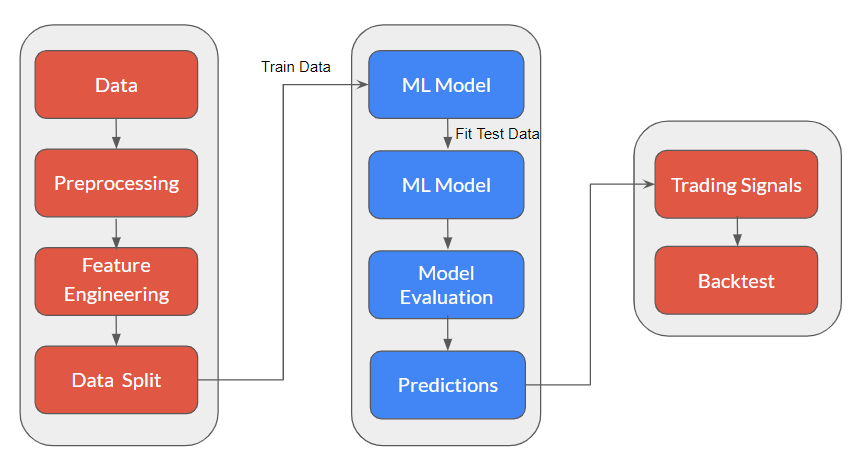

This is a general structure for using machine learning for trading. It involves data preprocessing and feature engineering to prepare the data for modeling, splitting the data into training and test sets, training and evaluating the machine learning model, generating trading signals, and rigorously backtesting the strategy to ensure its effectiveness. Continuous monitoring and optimization are essential to keep the system adaptive and profitable in evolving market conditions.

In [41]:
# Make neccessary imports
import pandas as pd
import yfinance as yf

In [42]:
# view python version

# pandas and yfinance current version
print(f'yfinance version : \n {yf.__version__}\n')

# pandas and yfinance current version

print(f'yfinance version : \n {yf.__version__}\n')

print(f'pandas version : \n {pd.__version__}')

yfinance version : 
 0.2.54

yfinance version : 
 0.2.54

pandas version : 
 2.2.2


**Get Historical Data**

In [43]:
# import warning, to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
#data = yf.download('AAPL', auto_adjust= True, end = '2024-01-01')['Close']

#data.columns =  ['prices']
#data.info()

In [45]:
#pip install yfinance --upgrade --no-cache-dir

In [106]:
import yfinance as yf

# Set the stock symbol (for example: AAPL for Apple)
symbol = 'AAPL'

# Get the data from Yahoo Finance using yfinance
data = yf.download(symbol, start='2010-01-01', end='2025-01-01', auto_adjust=True)

# Get the 'Close' column and rename it to 'prices'
data = data[['Close']]
data.columns = ['prices']

# Display the data summary
data.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prices  3774 non-null   float64
dtypes: float64(1)
memory usage: 59.0 KB


In [107]:
data.head()

,prices
Date,
2010-01-04,6.440332
2010-01-05,6.451466
2010-01-06,6.348846
2010-01-07,6.337108
2010-01-08,6.379241


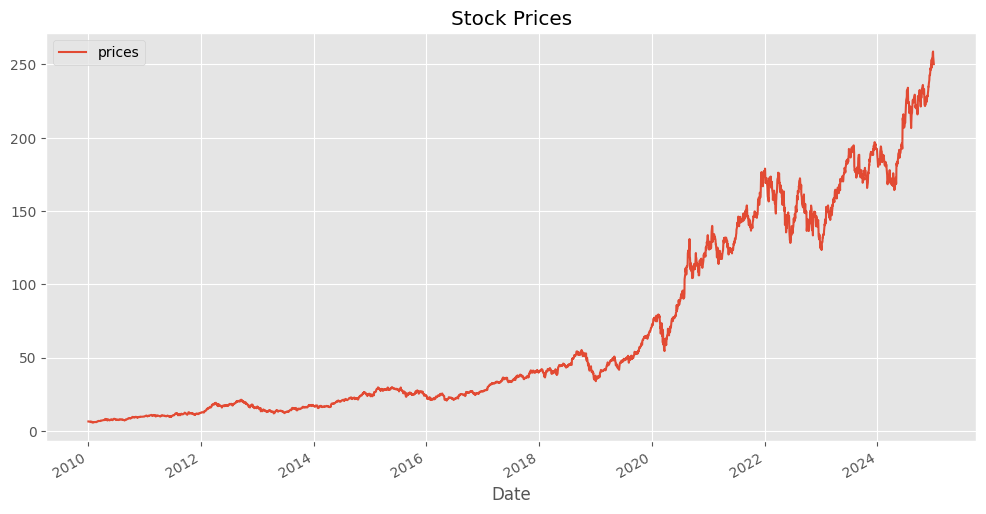

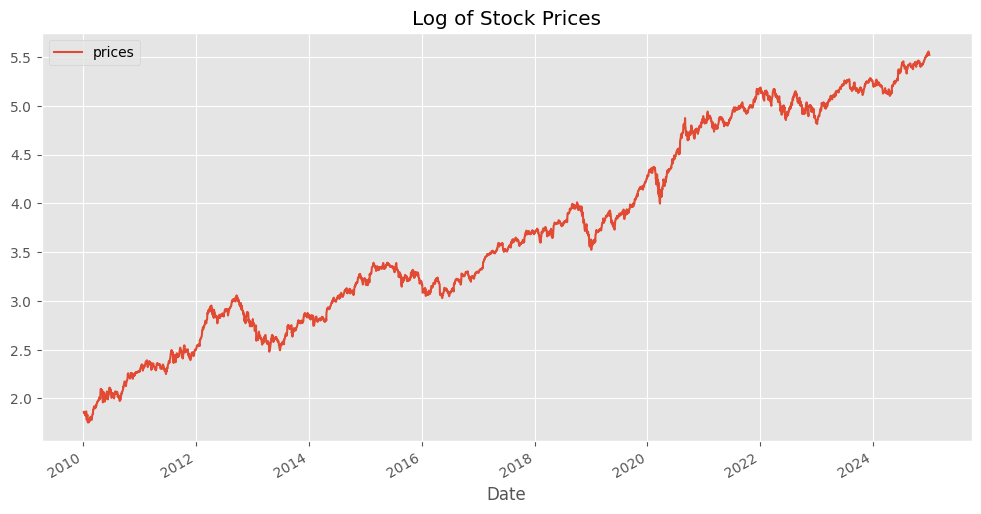

In [108]:
# Plot stock price evolulion
data.plot(figsize = (12, 6), title = 'Stock Prices')
np.log(data).plot(figsize = (12, 6), title = 'Log of Stock Prices')
plt.show()

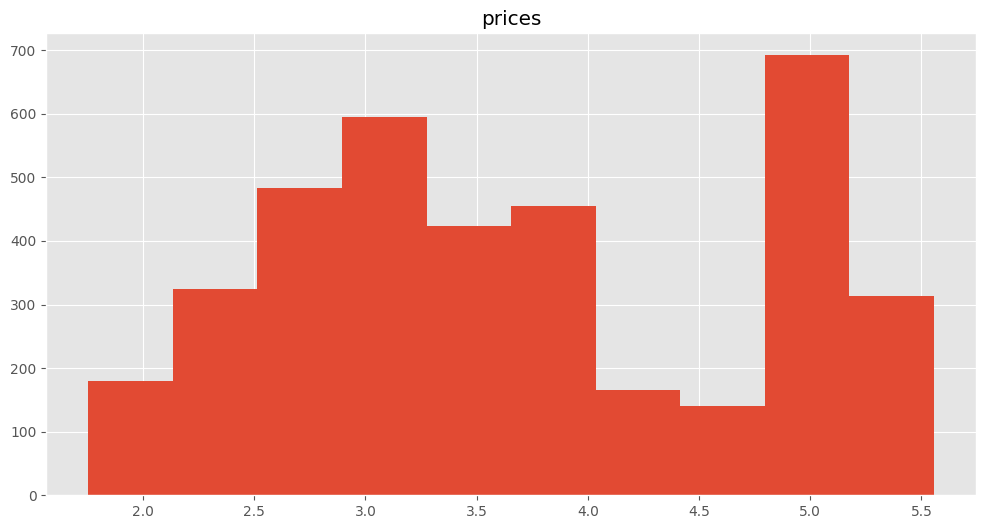

In [109]:
#Log of stock prices presented on the histogram
np.log(data).hist(figsize = (12, 6))
plt.show()

In [110]:
# In sample data from 2010 until end of 2023.
# subset data from 2010

data = data["2010":]
data['log_returns'] = np.log(data/data.shift(1))
data.head()

,prices,log_returns
Date,,
2010-01-04,6.440332,NaN
2010-01-05,6.451466,0.001727
2010-01-06,6.348846,-0.016034
2010-01-07,6.337108,-0.001851
2010-01-08,6.379241,0.006627


**Feature Engineering**

In [111]:
# define lag values and create empty list
lags, cols = 10, []

for lag in range(1, lags + 1):
  col = 'lags_%d' % lag
  data[col] = data['log_returns'].shift(lag)
  cols.append(col)

data.head()

,prices,log_returns,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,lags_10
Date,,,,,,,,,,,,
2010-01-04,6.440332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.451466,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.348846,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.337108,-0.001851,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.379241,0.006627,-0.001851,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# drop na values
data.dropna(inplace = True)

# **OLS Regression, Logistic Regression and Neural Network for Classification**

**ML Models**


## **2.1 OLS Regression**

Linear Regression mdoel is a model that can predict numeric values from features using a linear function.

In this brief project we use in a classification context - Predicting the sign of returns.


In [113]:
# import warning, to ignore warnings
ols_reg = np.linalg.lstsq(data[cols].values, np.sign( data['log_returns'].values))[0]
ols_reg

array([-0.58524208,  0.83191834,  0.18026125,  1.28303975,  0.93664279,
       -0.44293342,  0.82774562, -1.25869933,  2.35916957, -0.10544535])

In [114]:
# compute predictions
pred = np.sign( np.dot(data[cols].values, ols_reg ))

pred = pd.Series(pred, index = data.index)
pred.head()

,0
Date,
2010-01-20,-1.0
2010-01-21,1.0
2010-01-22,-1.0
2010-01-25,1.0
2010-01-26,-1.0


In [115]:
# Concate data

data['ols_pred'] = pred
data.head()

,prices,log_returns,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,lags_10,ols_pred
Date,,,,,,,,,,,,,
2010-01-20,6.371717,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-0.016034,0.001727,-1.0
2010-01-21,6.261575,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-0.016034,1.0
2010-01-22,5.951010,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-1.0
2010-01-25,6.111106,0.026547,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,1.0
2010-01-26,6.197474,0.014034,0.026547,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,-1.0


In [116]:
a = np.sign( data['log_returns'] * data['ols_pred'])
a.value_counts()

,count
1.0,1936
-1.0,1820
0.0,7


In [117]:
c = np.sign( data['log_returns'] * data['ols_pred'])
c.value_counts()

,count
1.0,1936
-1.0,1820
0.0,7


In [118]:
data['ols_returns'] = data['log_returns'] * data['ols_pred']
data.head()

,prices,log_returns,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,lags_10,ols_pred,ols_returns
Date,,,,,,,,,,,,,,
2010-01-20,6.371717,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-0.016034,0.001727,-1.0,0.015512
2010-01-21,6.261575,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-0.016034,1.0,-0.017437
2010-01-22,5.951010,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-1.0,0.050871
2010-01-25,6.111106,0.026547,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,1.0,0.026547
2010-01-26,6.197474,0.014034,0.026547,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,-1.0,-0.014034


<Axes: xlabel='Date'>

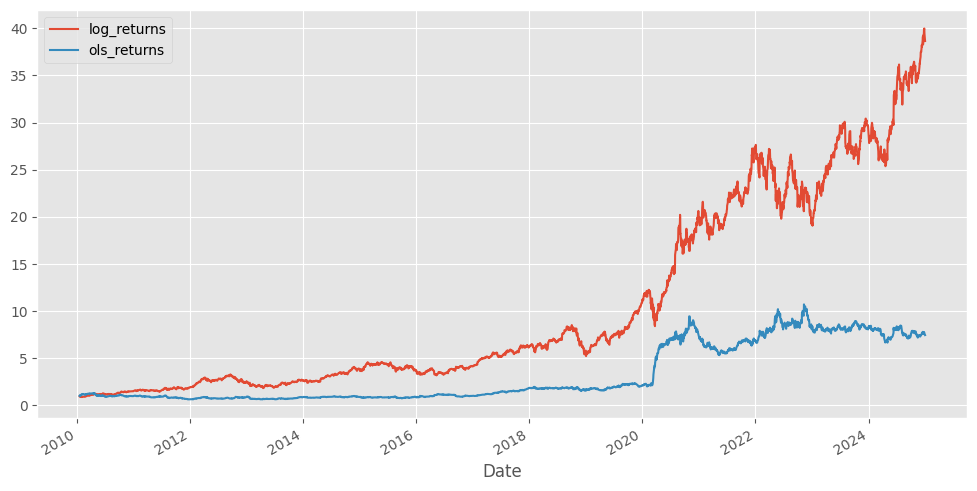

In [119]:
data[['log_returns', 'ols_returns']].cumsum().apply(np.exp).plot(figsize = (12, 6))

## **2.2 Logistics Regression**



Logistic Regression is a genarlized linear model for modelling the relationship between features and targets, where targets are of binary nature. A linear combination of the predictors is used to model the logg odds of an event (targets).

As in the ordinary least squares regression case, we assume that the movement (up or down) of stock returns is driven by a linear combination  of lag returns.

In [120]:
from sklearn import linear_model as lm


# Initialize model
log_reg = lm.LogisticRegression()

# fit model
log_reg.fit(data[cols], np.sign(data['log_returns']))

LogisticRegression()

,prices,log_returns,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,lags_10,ols_pred,ols_returns,logreg_pred,logreg_returns
Date,,,,,,,,,,,,,,,,
2010-01-20,6.371717,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-0.016034,0.001727,-1.0,0.015512,1.0,-0.015512
2010-01-21,6.261575,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-0.016034,1.0,-0.017437,1.0,-0.017437
2010-01-22,5.951010,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-1.0,0.050871,1.0,-0.050871
2010-01-25,6.111106,0.026547,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,1.0,0.026547,1.0,0.026547
2010-01-26,6.197474,0.014034,0.026547,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,-1.0,-0.014034,1.0,0.014034


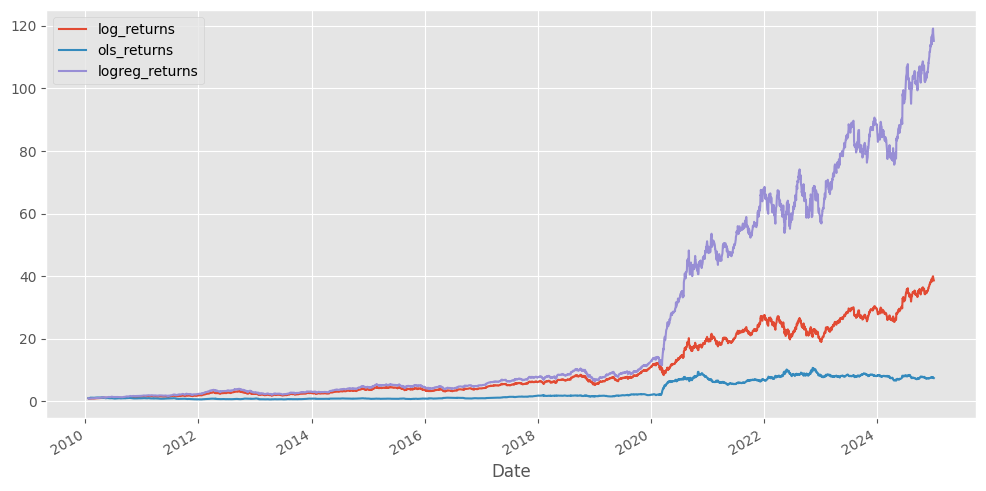

In [121]:
data['logreg_pred'] = log_reg.predict(data[cols])

data['logreg_returns'] = data['log_returns'] * data['logreg_pred']

data[['log_returns', 'ols_returns', 'logreg_returns']].cumsum().apply(np.exp).plot(figsize = (12, 6))
data.head()

## **2.3 Deep Neural Network**


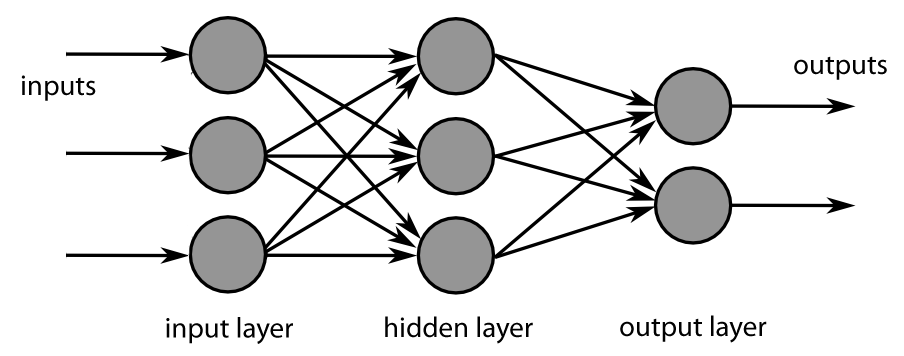

An example image of an artificial neural network.

Neural Network can be utilized for a supervise and unsupervise learning problems. A neural network is a computational model isnpired by the structure and function of the human's brain neural network.

From left to right (image above), It consist of nodes, called neurons, organized in layers, each neurons receives input data applies an activation function then passes the result to the next, continuing the process until the output layer. This is known as forward probagation.

From image above, we have three input neurons at the **input and hidden layer**, and two neurons at the **output layer**.  

- In case where there are more than one hidden layer, it's described a Deep Neural Network.


Methods like backprogation and optimization algorithm, such as gradient descent are used to update weights and biases to minimize prediction errors.

In [122]:
# Import packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


dnn_mod = Sequential()

# First layer
dnn_mod.add(Dense(lags * 10, input_dim = lags, activation = 'relu'))

# Second layer
dnn_mod.add(Dense(lags * 10, activation = 'relu'))

# Third layer
dnn_mod.add(Dense(lags * 10, activation = 'relu'))

# Output layer
dnn_mod.add(Dense(1, activation = 'sigmoid'))

In [123]:
# Compile model
dnn_mod.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit model
dnn_mod.fit(data[cols], np.sign(data['log_returns']), epochs = 100, batch_size= 50,  validation_split= 0.1)

# Predict
dnn_pred = dnn_mod.predict(data[cols])

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0372 - loss: 0.5216 - val_accuracy: 0.0027 - val_loss: 0.4013
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0017 - loss: 0.1797 - val_accuracy: 0.0027 - val_loss: 0.3826
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0015 - loss: 0.3120 - val_accuracy: 0.0027 - val_loss: 0.4378
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0013 - loss: 0.1124 - val_accuracy: 0.0027 - val_loss: 0.3863
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0019 - loss: 0.2031 - val_accuracy: 0.0027 - val_loss: 0.3956
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 4.9747e-04 - loss: 0.1182 - val_accuracy: 0.0027 - val_loss: 0.4009
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0017 - loss: 0.2545 - val_accuracy: 0.0027 - val_loss: 0.4181
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 6.5265e-04 - loss: 0.1264 - val_accuracy: 0.

,prices,log_returns,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,lags_10,ols_pred,ols_returns,logreg_pred,logreg_returns,dnn_pred,dnn_returns
Date,,,,,,,,,,,,,,,,,,
2010-01-20,6.371717,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-0.016034,0.001727,-1.0,0.015512,1.0,-0.015512,-1,0.015512
2010-01-21,6.261575,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-0.016034,1.0,-0.017437,1.0,-0.017437,-1,0.017437
2010-01-22,5.951010,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,-0.001851,-1.0,0.050871,1.0,-0.050871,-1,0.050871
2010-01-25,6.111106,0.026547,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006627,1.0,0.026547,1.0,0.026547,-1,-0.026547
2010-01-26,6.197474,0.014034,0.026547,-0.050871,-0.017437,-0.015512,0.043287,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,-1.0,-0.014034,1.0,0.014034,-1,-0.014034


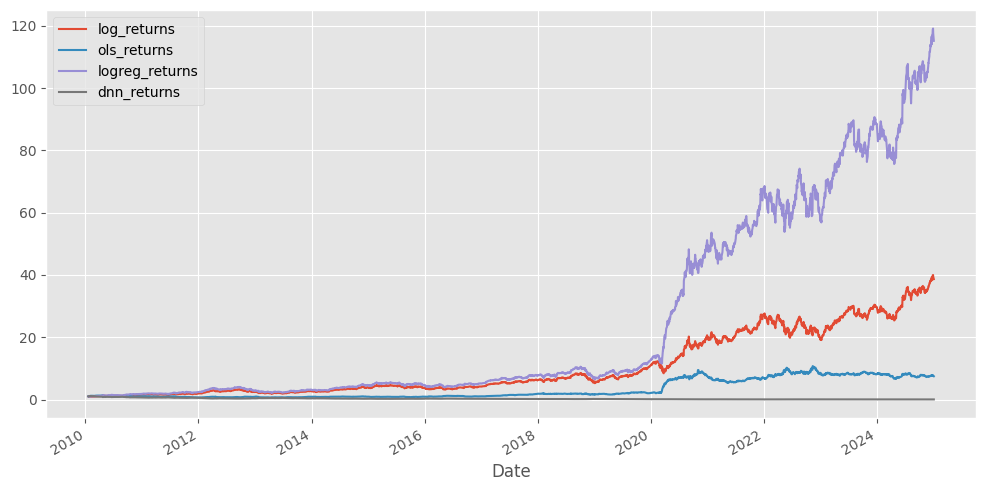

In [124]:

data['dnn_pred'] = np.where(dnn_pred > 0.5, 1, -1)

data['dnn_returns'] = data['log_returns'] * data['dnn_pred']

data[['log_returns', 'ols_returns', 'logreg_returns', 'dnn_returns']].cumsum().apply(np.exp).plot(figsize = (12, 6))
data.head()

# **Out Sample Results**

In [125]:
# Test data from 2024

data_test = yf.download('AAPL', auto_adjust= True, start = '2023-10-01')['Close']

data_test['log_returns'] = np.log(data_test/data_test.shift(1))
data_test.head()


# define lag values and creat empty list
lags, cols = 10, []

for lag in range(1, lags + 1):
  col = 'lags_%d' % lag
  data_test[col] = data_test['log_returns'].shift(lag)
  cols.append(col)



data_test = data_test["2025-01": "2025-03"]
data_test.head()

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL,log_returns,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,lags_10
Date,,,,,,,,,,,,
2025-01-02,243.582199,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,0.018641,0.006990,-0.021655,0.009673
2025-01-03,243.092728,-0.002011,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,0.018641,0.006990,-0.021655
2025-01-06,244.730927,0.006716,-0.002011,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,0.018641,0.006990
2025-01-07,241.944000,-0.011453,0.006716,-0.002011,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,0.018641
2025-01-08,242.433441,0.002021,-0.011453,0.006716,-0.002011,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060


In [126]:
# Predict for each model

data_test['ols_pred'] = np.sign( np.dot(data_test[cols].values, ols_reg ))

data_test['logreg_pred'] = np.sign( log_reg.predict(data_test[cols]))

data_test['dnn_pred'] = np.where(dnn_mod.predict(data_test[cols]) > 0.5, 1, -1)

data_test.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Ticker,AAPL,log_returns,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,lags_9,lags_10,ols_pred,logreg_pred,dnn_pred
Date,,,,,,,,,,,,,,,
2025-01-02,243.582199,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,0.018641,0.006990,-0.021655,0.009673,-1.0,1.0,-1
2025-01-03,243.092728,-0.002011,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,0.018641,0.006990,-0.021655,-1.0,1.0,-1
2025-01-06,244.730927,0.006716,-0.002011,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,0.018641,0.006990,-1.0,1.0,-1
2025-01-07,241.944000,-0.011453,0.006716,-0.002011,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,0.018641,-1.0,1.0,-1
2025-01-08,242.433441,0.002021,-0.011453,0.006716,-0.002011,-0.026586,-0.007083,-0.013352,-0.013331,0.003171,0.011413,0.003060,-1.0,1.0,-1


In [127]:
# Obtain all pred
data_test['ret_sign'] = np.sign(data_test['log_returns'])
cols_pred = ['ret_sign', 'ols_pred', 'logreg_pred', 'dnn_pred']
preds = data_test[cols_pred]


for col in preds.columns:
  print(f'{col}: {preds[col].value_counts()}')


def compute_accuracy(data, actual_col='ret_sign'):
    accuracies = {}
    for col in data.columns:
        if col != actual_col:
            accuracies[col] = (data[col] == data[actual_col]).mean()
    return accuracies

# Compute accuracy
accuracies = compute_accuracy(preds)

print()
print(preds.ret_sign.value_counts())
print("Accuracy for each model:")
print(accuracies)
print(
)

preds.head(
)

ret_sign: ret_sign
-1.0    16
 1.0    16
Name: count, dtype: int64
ols_pred: ols_pred
-1.0    23
 1.0     9
Name: count, dtype: int64
logreg_pred: logreg_pred
1.0    32
Name: count, dtype: int64
dnn_pred: dnn_pred
-1    32
Name: count, dtype: int64

ret_sign
-1.0    16
 1.0    16
Name: count, dtype: int64
Accuracy for each model:
{'ols_pred': 0.59375, 'logreg_pred': 0.5, 'dnn_pred': 0.5}



Ticker,ret_sign,ols_pred,logreg_pred,dnn_pred
Date,,,,
2025-01-02,-1.0,-1.0,1.0,-1
2025-01-03,-1.0,-1.0,1.0,-1
2025-01-06,1.0,-1.0,1.0,-1
2025-01-07,-1.0,-1.0,1.0,-1
2025-01-08,1.0,-1.0,1.0,-1


In [128]:
# Compute returns
data_test['ols_returns'] = data_test['log_returns'] * data_test['ols_pred']

data_test['logreg_returns'] = data_test['log_returns'] * data_test['logreg_pred']

data_test['dnn_returns'] = data_test['log_returns'] * data_test['dnn_pred']

test_returns = data_test[['log_returns', 'ols_returns', 'logreg_returns', 'dnn_returns']]
test_returns.head()

Ticker,log_returns,ols_returns,logreg_returns,dnn_returns
Date,,,,
2025-01-02,-0.026586,0.026586,-0.026586,0.026586
2025-01-03,-0.002011,0.002011,-0.002011,0.002011
2025-01-06,0.006716,-0.006716,0.006716,-0.006716
2025-01-07,-0.011453,0.011453,-0.011453,0.011453
2025-01-08,0.002021,-0.002021,0.002021,-0.002021


In [129]:
(test_returns * 100).describe()

Ticker,log_returns,ols_returns,logreg_returns,dnn_returns
count,32.000000,32.000000,32.000000,32.000000
mean,-0.065710,0.390327,-0.065710,0.065710
std,1.865105,1.823678,1.865105,1.865105
min,-4.123896,-3.589210,-4.123896,-3.589210
25%,-0.816617,-0.671508,-0.816617,-0.878790
50%,0.032752,0.166960,0.032752,-0.032752
75%,0.878790,1.980924,0.878790,0.816617
max,3.589210,4.123896,3.589210,4.123896


In [130]:
# Strategy returns: IN Sample
(data[['log_returns', 'ols_returns', 'logreg_returns', 'dnn_returns']].sum().apply(np.exp) - 1) * 100

,0
log_returns,3765.436212
ols_returns,646.794187
logreg_returns,11416.803461
dnn_returns,-97.412970


In [131]:
# Strategy returns: Out Sample

(test_returns.sum().apply(np.exp) - 1 ) * 100

,0
Ticker,
log_returns,-2.080782
ols_returns,13.304048
logreg_returns,-2.080782
dnn_returns,2.124998


The DNN performs better than the others in terms of returns, scoring 12 %. Logistic Regression model perform best in-sample but worse out-sample. However, is very unlikely for a market participant to implement a model that perfromed poorly in-sample, as is the case with DNN.

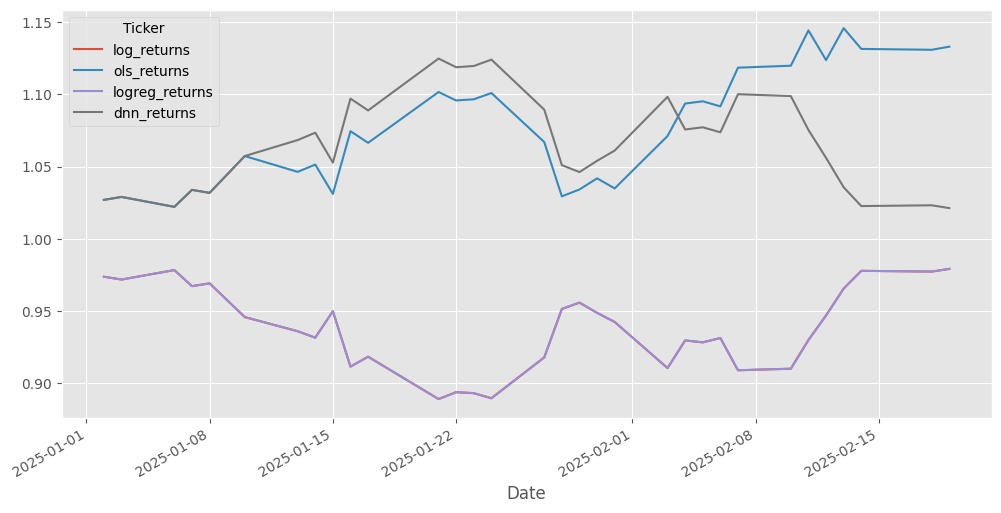

In [132]:
# plot results
data_test[['log_returns', 'ols_returns', 'logreg_returns', 'dnn_returns']].cumsum().apply(np.exp).plot(figsize = (12, 6));

# **Real-World Applications of Machine Learning in Financial Trading**


ML has found a multitude of real-world applications in the realm of trading, revolutionizing the financial industry.

One notable area is the applications in **algorithmic trading**, where machine learning models are employed to automate the execution of trades, optimizing strategies, and responding to market changes at lightning speed.

**Sentiment analysis**, another crucial concept, leverages natural language processing to process news articles, social media, and other textual data to gauge market sentiment and make informed trading decisions.

**Risk management** is also greatly enhanced through machine learning, as predictive models can assess and mitigate potential risks in real-time.  Machine learning has undoubtedly become a cornerstone of modern trading, providing invaluable insights, risk mitigation, and efficiency in the financial landscape.  

As markets become more data-driven and sophisticated, the integration of machine learning in trading is no longer a luxury but a necessity to gain a competitive edge.



In [133]:
# The End !!